In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
#from seaborn import color_palette
#colors = color_palette()

In [2]:
colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

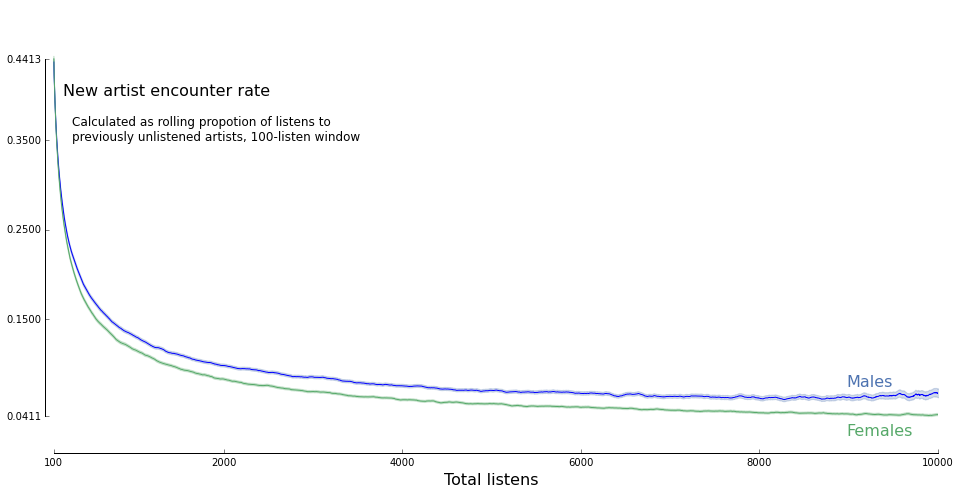

In [81]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
npz = np.load('../staging/m_results.npz')
m_mean = npz['mean']
m_std = npz['std']
m_n = npz['n']
m_ci = 1.96 * (m_std/np.sqrt(m_n))
ax.plot(range(100,50100),m_mean,lw=1)
ax.fill_between(range(100,50100),m_mean-m_ci,m_mean+m_ci,alpha=0.25,color=colors[0])
ax.annotate('Males',xy=(9000,0.075),color = colors[0],fontsize=16)

npz = np.load('../staging/f_results.npz')
f_mean = npz['mean']
f_std = npz['std']
f_n = npz['n']
f_ci = 1.96 * (f_std/np.sqrt(f_n))
ax.plot(range(100,50100),f_mean,lw=1,c=colors[1])
ax.fill_between(range(100,50100),f_mean-f_ci,f_mean+f_ci,alpha=0.25,color=colors[1])
ax.annotate('Females',xy=(9000,0.02),color = colors[1],fontsize=16)

ax.set_ylim(0,.5)
ax.set_xlim(0,10000)
ax.set_axis_bgcolor('white')
ax.set_xticks([100]+list(np.arange(2000,10001,2000)))
ax.spines['bottom'].set_bounds(100,10000)

ax.set_yticks([min(m_mean[:10000].min(),f_mean[:10000].min())]+list(np.arange(.15,.4,.1))+[max(m_mean[:10000].max(),f_mean[:10000].max())])
ax.spines['left'].set_bounds(min(m_mean[:10000].min(),f_mean[:10000].min()),max(m_mean[:10000].max(),f_mean[:10000].max()))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.annotate("New artist encounter rate",xy=(200,0.4),fontsize=16) #\n(rolling proportion of never-\nbefore-listened artists, 100-\nlisten window)
ax.annotate("Calculated as rolling propotion of listens to\npreviously unlistened artists, 100-listen window",xy=(300,0.35),fontsize=12) #\n(rolling proportion of never-\nbefore-listened artists, 100-\nlisten window)
ax.set_xlabel('Total listens',fontsize=16)


In [82]:
pd.Series(m_ci).describe()

count    10724.000000
mean         0.002778
std          0.003426
min          0.001671
25%          0.001747
50%          0.001983
75%          0.002586
max          0.127400
dtype: float64

In [83]:
pd.Series(f_ci).describe()

count    23663.000000
mean         0.002138
std          0.002106
min          0.001197
25%          0.001289
50%          0.001475
75%          0.002134
max          0.043377
dtype: float64